In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyneb as pn
from pyneb import config, log_, atomicData
from pyneb.utils.misc import parseAtom
pn.config.use_multiprocs()
from astropy.io import fits
from astropy.wcs import WCS

from pathlib import Path

In [2]:
data_dir = Path('/Users/christophemorisset/DATA/MUSE_Jorge/hektor_fits/ngc6778_maps/ngc6778_long_maps')

lines_dict = {1:'4641.0',2:'4651.0',3:'4659.0', 4:'4662.0',5:'4686.0',6:'4711.0',7:'4713.0',8:'4741.0',
              9:'4861.0',10:'4959.0',11:'5200.0', 12:'5343.0',13:'5677',14:'5681.0',15:'5755.0',16:'5877',
              17:'6301.0',18:'6313.0',19:'6365.0',20:'6463.0', 21:'6549.0',22:'6564.0',23:'6585.0',24:'6679.0',
              25:'6719.0',26:'6733.0',27:'7002',28:'7006.0',29:'7067.0',30:'7137.0', 31:'7321.0',32:'7332.0',
              33:'7532.0',34:'7753.0',35:'7772.0',36:'7774.0',37:'7777',38:'8048.0',39:'8730.0', 40:'8736.0',
              41:'8753.0',42:'9071.0',43:'9072.0'}
id_dict = {1:'NIII_4641',2:'OII_4649',3:'FeIII_4659', 4:'OII_4662',5:'HeII_4686',6:'ArIV_4711',7:'HeI_4713',8:'ArIV_4740',
           9:'HI_4861',10:'OIII_4959',11:'NI_5200', 12:'CII_5342',13:'NII_5676',14:'NII_5679',15:'NII_5755',16:'HeI_5876',
           17:'OI_6300',18:'SIII_6312',19:'OI_6363',20:'CII_6461',21:'NII_6548',22:'HI_6562',23:'NII_6583',24:'HeI_6678',
           25:'SII_6717',26:'SII_6730',27:'OIV_7004',28:'NeV_7005',29:'HeI_7065',30:'ArIII_7135',31:'OII_7320',32:'OII_7330',
           33:'ClIV_7530',34:'ArIII_7751',35:'OI_7771',36:'OI_7773',37:'OI_7775',38:'ClIV_8046',39:'CI_8727', 40:'HeI_8733',
           41:'HI_8750',42:'SIII_9068'}

l_dic = {'4641.0': ('N', 2, '4641A'),
         '4651.0' : ('O', 2, '4649A'),
         '4659.0' : ('Fe', 3, '4659A'),
         '4662.0' : ('O', 2, '4662A'),
         '6549.0' : ('N', 2, '6548A'),
         '6585.0' : ('N', 2, '6584A'),
         '5755.0' : ('N', 2, '5755A'),
         '6719.0' : ('S', 2, '6716A'),
         '6733.0' : ('S', 2, '6731A'),
         '4959.0' : ('O', 3, '4959A')
         }

In [3]:
obs = pn.Observation()
for lam_str in l_dic:
    data_file = data_dir / Path('ngc6778_MUSE_{}.fits'.format(lam_str))
    fits_hdu = fits.open(data_file)[0]
    fits_data = fits_hdu.data
    err_data_file = data_dir / Path('ngc6778_MUSE_{}_error.fits'.format(lam_str))
    err_fits_hdu = fits.open(err_data_file)[0]
    err_fits_data = err_fits_hdu.data
    
    line = pn.EmissionLine(l_dic[lam_str][0], l_dic[lam_str][1], l_dic[lam_str][2], 
                           obsIntens=fits_data.ravel(), 
                           obsError=err_fits_data.ravel(), corrected=True)
    obs.addLine(line)
wcs = WCS(fits_hdu.header).celestial

warng EmissionLine: line 4641A for atom N2 not valid
warng EmissionLine: line 4649A for atom O2 not valid
warng EmissionLine: line 4662A for atom O2 not valid


In [4]:
diags = pn.Diagnostics()
diags.ANN_inst_kwargs['verbose']=True
diags.addDiagsFromObs(obs)

warng Observation: No line for O2_3727A+ from NoneNone at wavelength None (blend=False)


/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/diags.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """ @module
/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/diags.py:1: RuntimeWarning: invalid value encountered in true_divide
  """ @module


In [7]:
pn.log_.timer('Starting', quiet=True)
pn.config.verbose=2
Te_ANN, Ne_ANN = diags.getCrossTemDen('[NII] 5755/6584', '[SII] 6731/6716', obs=obs, use_ANN=True)
Te_ANN = np.reshape(Te_ANN, fits_data.shape)
Ne_ANN = np.reshape(Ne_ANN, fits_data.shape)
pn.log_.timer('ANN getCrossTemDen done')

/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/diags.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """ @module
/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/diags.py:1: RuntimeWarning: invalid value encountered in true_divide
  """ @module


Instantiation. V 0.17
Training set size = 900, Test set size = 0
Train data scaled. Log10 applied. 
Test data scaled. 
Training set size = 900, Test set size = 0
Training set size = 900, Test set size = 0
Regression Model SK_ANN
Training 2 inputs for 2 outputs with 900 data
(900, 2) (900, 2)
RM trained, with 6145 iterations. Score = 0.999
MLPRegressor(activation='tanh', hidden_layer_sizes=(10, 30, 10), max_iter=20000,
             solver='lbfgs')
Training time 7.8 s.
Test data scaled. Log10 applied. 
Training set size = 900, Test set size = 21058
Predicting from 2 inputs to 2 outputs using 21058 data in 0.01 secs.
   None: ANN getCrossTemDen done in 7.830954074859619


/Users/christophemorisset/Google Drive/Pro/AI4neb/ai4neb/Regressor/RegressionModel.py:541: RuntimeWarning: divide by zero encountered in log10
  X = np.log10(X)


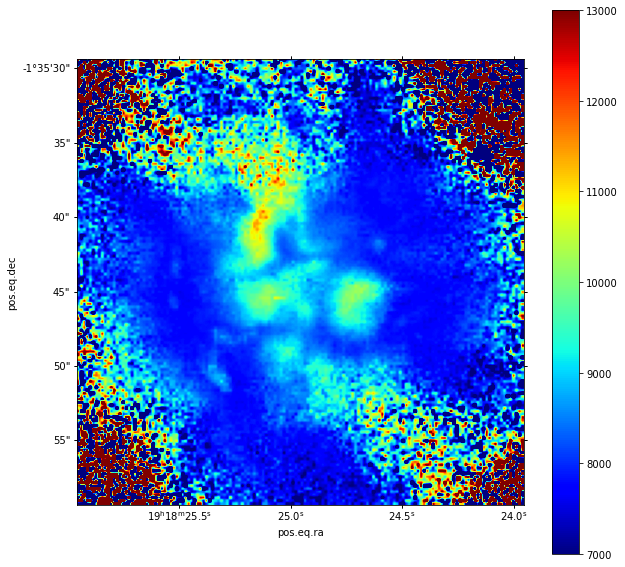

In [10]:
f, ax = plt.subplots(subplot_kw={'projection': wcs}, figsize=(10,10))
im = ax.imshow(Te_ANN, vmin=7000, vmax=13000, cmap='jet')
cb = f.colorbar(im, ax=ax)